<a href="https://colab.research.google.com/github/sujataprasad01/Cognizant-AI-Program-Project1/blob/main/Cognizant_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing Dataset

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cognizant Internship/4.1 sample_sales_data.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
data.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [5]:
data.shape

(7829, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [7]:
data.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [8]:
col=data.describe()

In [9]:
col

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


# Visualisation

In [10]:
def plot_continuous_distribution(data):
  sns.displot(data)

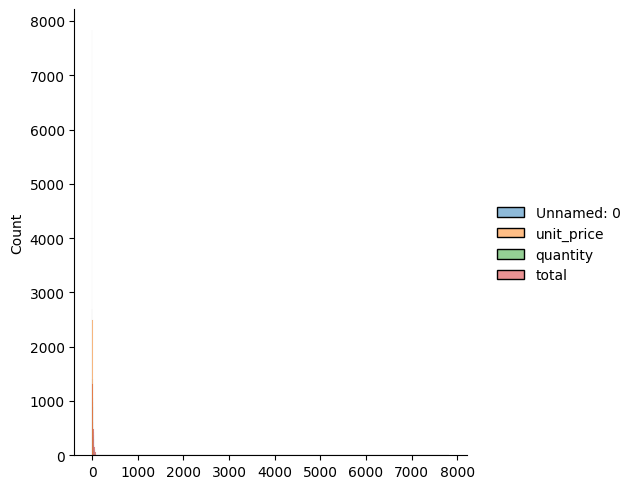

In [11]:
plot_continuous_distribution(data)

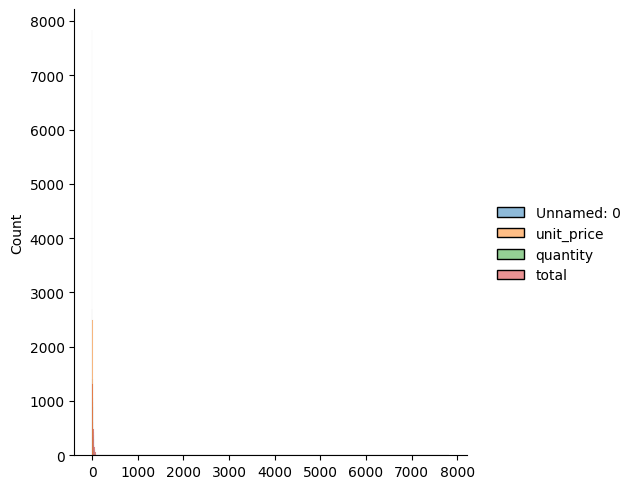

In [12]:
sns.displot(data)

[Text(0.5, 1.0, "Distribution of Index(['Unnamed: 0', 'unit_price', 'quantity', 'total'], dtype='object')")]

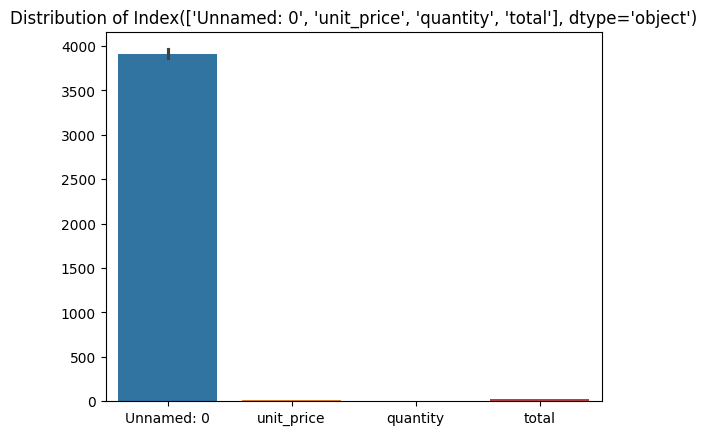

In [13]:
sns.barplot(data).set(title=f'Distribution of {col.columns}')

In [14]:
data.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [15]:
data['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 7826, 7827, 7828])

In [16]:
data.columns[0]

'Unnamed: 0'

In [17]:
data['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
7824    7824
7825    7825
7826    7826
7827    7827
7828    7828
Name: Unnamed: 0, Length: 7829, dtype: int64

In [18]:
data['Unnamed: 0'].value_counts()

0       1
5230    1
5228    1
5227    1
5226    1
       ..
2605    1
2604    1
2603    1
2602    1
7828    1
Name: Unnamed: 0, Length: 7829, dtype: int64

In [19]:
data['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 7826, 7827, 7828])

In [20]:
unique=[]
for i in data.columns:
  unique.append(data[i].value_counts())


In [21]:
unique

[0       1
 5230    1
 5228    1
 5227    1
 5226    1
        ..
 2605    1
 2604    1
 2603    1
 2602    1
 7828    1
 Name: Unnamed: 0, Length: 7829, dtype: int64,
 a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
 6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
 6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
 6476e388-3990-471f-b415-3ee59ae18832    1
 10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                        ..
 a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
 6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
 711a4162-1985-4f5a-94ca-137cfacaeadf    1
 7d1e9010-dbaf-4770-a467-f31477910f7a    1
 afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
 Name: transaction_id, Length: 7829, dtype: int64,
 2022-03-02 19:32:20    2
 2022-03-05 10:11:33    2
 2022-03-01 18:12:17    2
 2022-03-03 13:28:14    2
 2022-03-07 17:13:29    2
                       ..
 2022-03-01 10:00:58    1
 2022-03-02 11:05:58    1
 2022-03-04 17:48:49    1
 2022-03-04 14:53:27    1
 2022-03-06 13:50:36    1
 Name: timestamp, Leng

In [22]:
unique[0]

0       1
5230    1
5228    1
5227    1
5226    1
       ..
2605    1
2604    1
2603    1
2602    1
7828    1
Name: Unnamed: 0, Length: 7829, dtype: int64

In [23]:
uni=[]
j=0
for i in unique:
  uni.append(unique[j])
  j=j+1
# print(uni)

In [24]:
uni

[0       1
 5230    1
 5228    1
 5227    1
 5226    1
        ..
 2605    1
 2604    1
 2603    1
 2602    1
 7828    1
 Name: Unnamed: 0, Length: 7829, dtype: int64,
 a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
 6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
 6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
 6476e388-3990-471f-b415-3ee59ae18832    1
 10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                        ..
 a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
 6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
 711a4162-1985-4f5a-94ca-137cfacaeadf    1
 7d1e9010-dbaf-4770-a467-f31477910f7a    1
 afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
 Name: transaction_id, Length: 7829, dtype: int64,
 2022-03-02 19:32:20    2
 2022-03-05 10:11:33    2
 2022-03-01 18:12:17    2
 2022-03-03 13:28:14    2
 2022-03-07 17:13:29    2
                       ..
 2022-03-01 10:00:58    1
 2022-03-02 11:05:58    1
 2022-03-04 17:48:49    1
 2022-03-04 14:53:27    1
 2022-03-06 13:50:36    1
 Name: timestamp, Leng

In [25]:
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [26]:
categorical = data.select_dtypes(include=['object', 'category'])

In [27]:
categorical

,transaction_id,timestamp,product_id,category,customer_type,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,debit card
...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,cash


In [28]:
numerical = data.select_dtypes(include=['int', 'float'])

In [29]:
numerical

,Unnamed: 0,unit_price,quantity,total
0,0,3.99,2,7.98
1,1,3.99,1,3.99
2,2,0.19,2,0.38
3,3,0.19,4,0.76
4,4,4.49,2,8.98
...,...,...,...,...
7824,7824,14.19,2,28.38
7825,7825,16.99,1,16.99
7826,7826,14.19,2,28.38
7827,7827,16.99,4,67.96


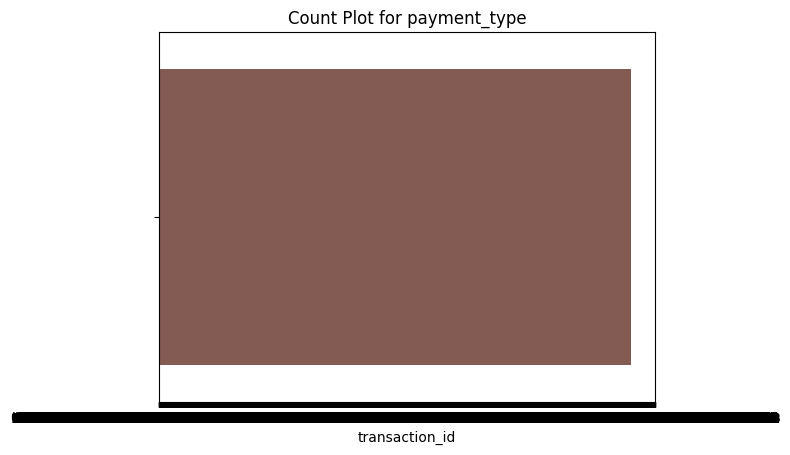

In [30]:
for column in categorical:
    sns.barplot(x=column, data=data, estimator=lambda x: len(x))
    plt.title(f"Count Plot for {column}")

<Axes: xlabel='variable', ylabel='count'>

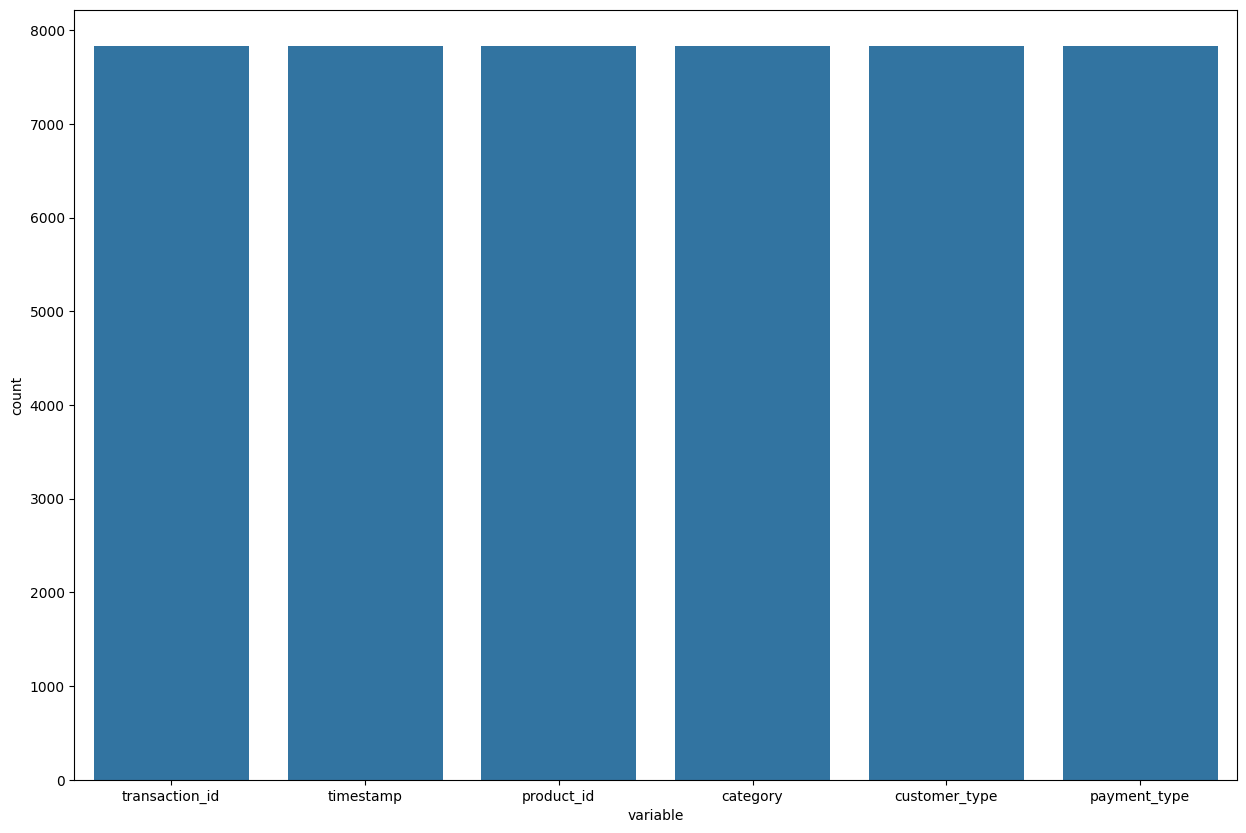

In [32]:

# Melt the DataFrame to convert it into long format suitable for plotting
melted_data = categorical.melt()
plt.figure(figsize=(15, 10))
sns.countplot(data=melted_data, x="variable")

In [34]:
data.corr()

<ipython-input-34-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,unit_price,quantity,total
Unnamed: 0,1.000000,0.623392,0.003927,0.483878
unit_price,0.623392,1.000000,0.024588,0.792018
quantity,0.003927,0.024588,1.000000,0.521926
total,0.483878,0.792018,0.521926,1.000000


<ipython-input-35-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

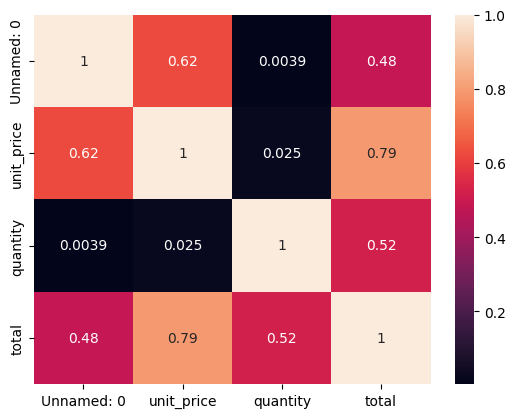

In [35]:
sns.heatmap(data.corr(), annot=True)